In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import math

plt.rc('font', size=18)

# TODO set result output
csvs = ['ccj-alpha_1..12.csv',
'rv-counter_1..12.csv',
'ccj-beta-prime_1..12.csv',
'tv-uu_1..12.csv',
'kr-n_1..4.csv',
'pps-arbiter-standard_1..4.csv']

!echo results-*

results-00 results-01 results-02 results-03 results-04 results-05 results-06 results-07 results-08


In [2]:
csvs # Misc is ignored

['ccj-alpha_1..12.csv',
 'rv-counter_1..12.csv',
 'ccj-beta-prime_1..12.csv',
 'tv-uu_1..12.csv',
 'kr-n_1..4.csv',
 'pps-arbiter-standard_1..4.csv']

In [3]:
def load_bench(path):
    df = pd.read_csv(path, comment='#')
    df.dropna(axis=1, how='all', inplace=True)
    df.drop('time_unit', axis=1, inplace=True)
    return df

def show_bench(bench, ax, nb_bench=4, x='pix', name=None, version=''):
    nb_aut = len(bench) // nb_bench

    for i in range(nb_bench):
        begin = i*nb_aut

        if name != None and name != bench['name'][begin][:-2]:
            continue

        end = (i+1)*nb_aut
        ax.plot(bench[begin:end][x], bench[begin:end]['real_time'], "-o", label=version + bench['name'][begin][:-2])
        
    ax.set_xlabel(x)
    ax.set_ylabel('time (ns)')
 
        
def show_speedup(bench, ax,  nb_bench=4, x='pix', version=''):
    nb_aut = len(bench) // nb_bench

    ax.plot(bench[:nb_aut][x], np.ones((nb_aut)))
    ref = bench[:nb_aut].real_time.values
    
    for i in range(1, nb_bench):
        begin = i*nb_aut
        end = (i+1)*nb_aut
                
        ax.plot(bench[begin:end][x], ref / bench[begin:end]['real_time'], "-o", label=version + bench['name'][begin][:-2])
    
    ax.set_xlabel(x)
    ax.set_ylabel('speed up')

    
def show_vs(bench, ax, algo1, algo2, lim=None, nb_bench=4):
    bench1 = bench[bench['name'].str.match(algo1 + '//*')]
    bench2 = bench[bench['name'].str.match(algo2 + '//*')]

    if (len(bench1) == 0):
        raise ValueError('No bench named ' + algo1)
    if (len(bench2) == 0):
        raise ValueError('No bench named ' + algo2)

    if not lim is None:
        ax.set_xlim(0, lim)
        ax.set_ylim(0, lim)
    
    ax.plot(bench1['real_time'], bench2['real_time'], '+')
    ax.set_xlabel(algo1)
    ax.set_ylabel(algo2)
    
def show_bests(bench, ax, algos, nb_bench=4):
    nb_aut = len(bench) // nb_bench

    n_algos = nb_bench
    bests = np.zeros((n_algos, n_algos))

    for i in range(n_algos):
        for j in range(n_algos):
            bench1 = bench[i::nb_bench]
            bench2 = bench[j::nb_bench]

            bests[i,j] = (bench1['real_time'].values > bench2['real_time'].values).sum()

    bests = bests / bests.sum()
    ax.imshow(bests, cmap='gray')
    
    title = 'bests:\n'
    for i in range(len(algos)):
        title += algos[i] + ' -> ' + str(i) + ', '
    ax.title.set_text(title)

def last():
    return sorted(glob.glob('results-*'))[-1]

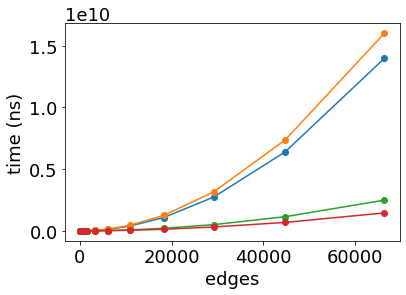

In [4]:
bench = load_bench('results/par4/ccj-alpha_1..12.csv')
show_bench(bench, plt.gca(), x='edges')

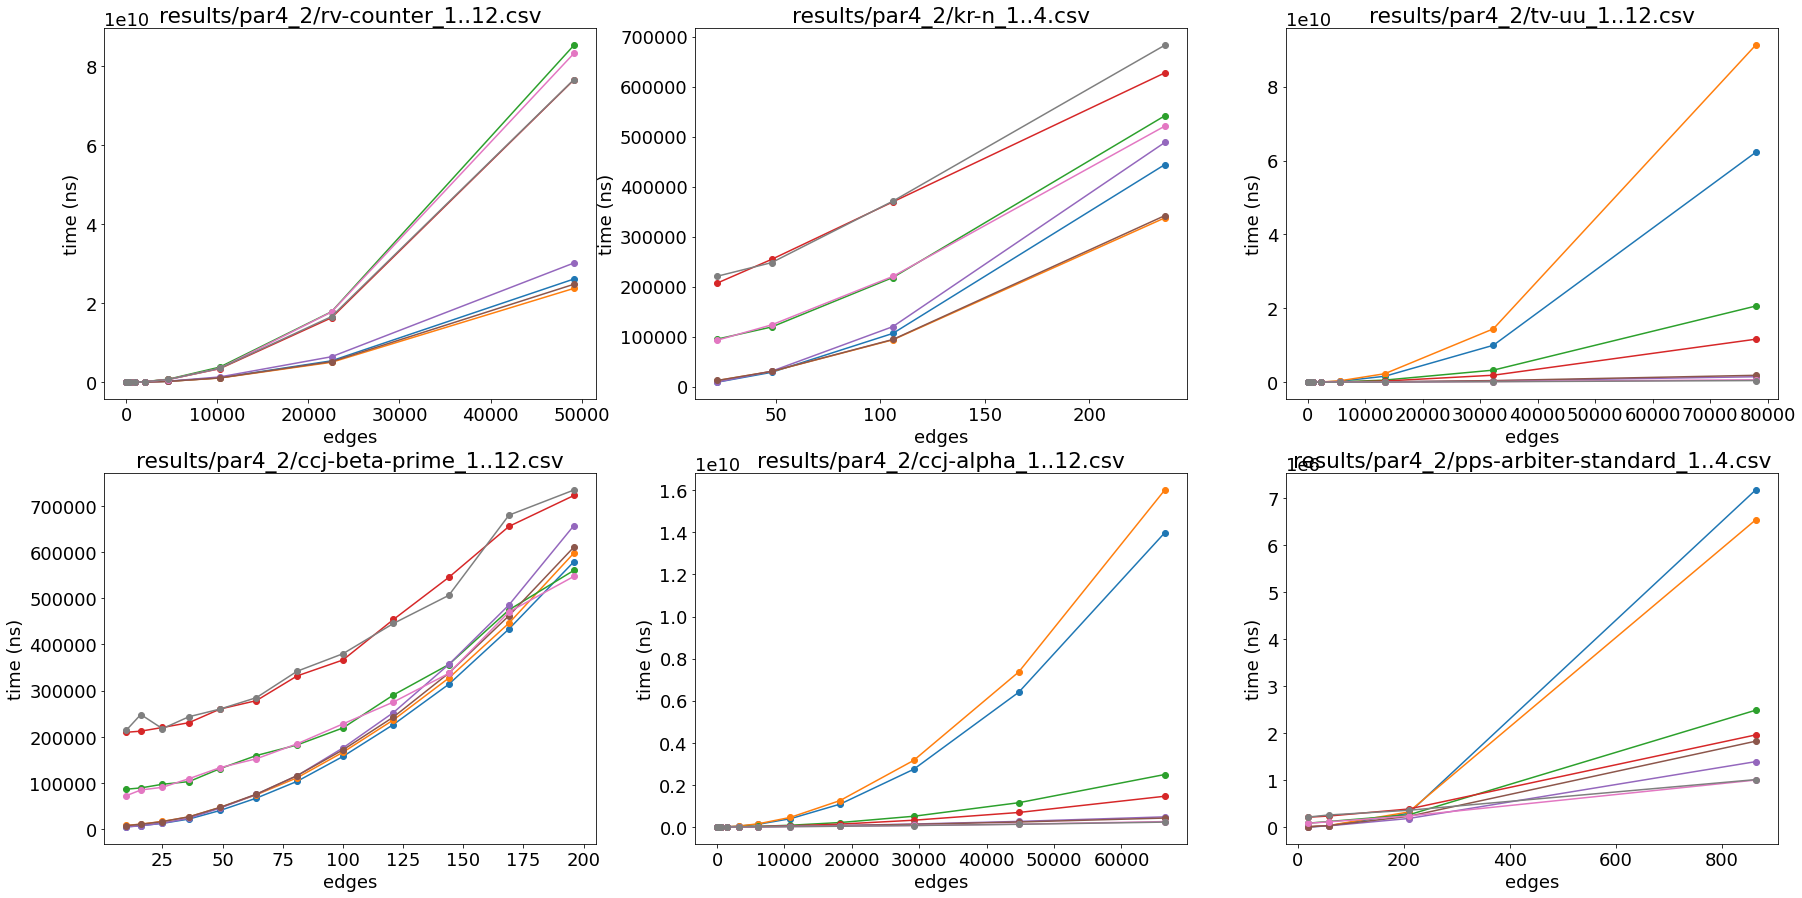

In [5]:
def compare(benchs, type='speed_up',  nb_bench=4, x='pix'):
    
    bench_csv = glob.glob(benchs[0] + '/*.{}'.format('csv'))
    
    nb_bench_x = 2
    nb_bench_y = (len(bench_csv) - 1) // nb_bench_x

    (fig, axes) = plt.subplots(nb_bench_x, nb_bench_y, figsize=(30, 15))
    axes = axes.flatten()
    
    for path in benchs:
        i = 0
        bench_csv = glob.glob(path + '/*.{}'.format('csv'))
        
        for f in bench_csv:
            # Not usefull for gpgpu but needed in this example
            if f[-8:] == 'misc.csv' or f[-7:] == 'tmp.csv':
                continue

            bench = load_bench(f)
                
            if type == 'speed_up':
                show_speedup(bench, axes[i], nb_bench, x='edges', version=path)
            else:
                show_bench(bench, axes[i], nb_bench, x='edges', version=path)

            axes[i].title.set_text(f)
            i += 1

compare(['results/par4/', 'results/par4_2//'], type='time')

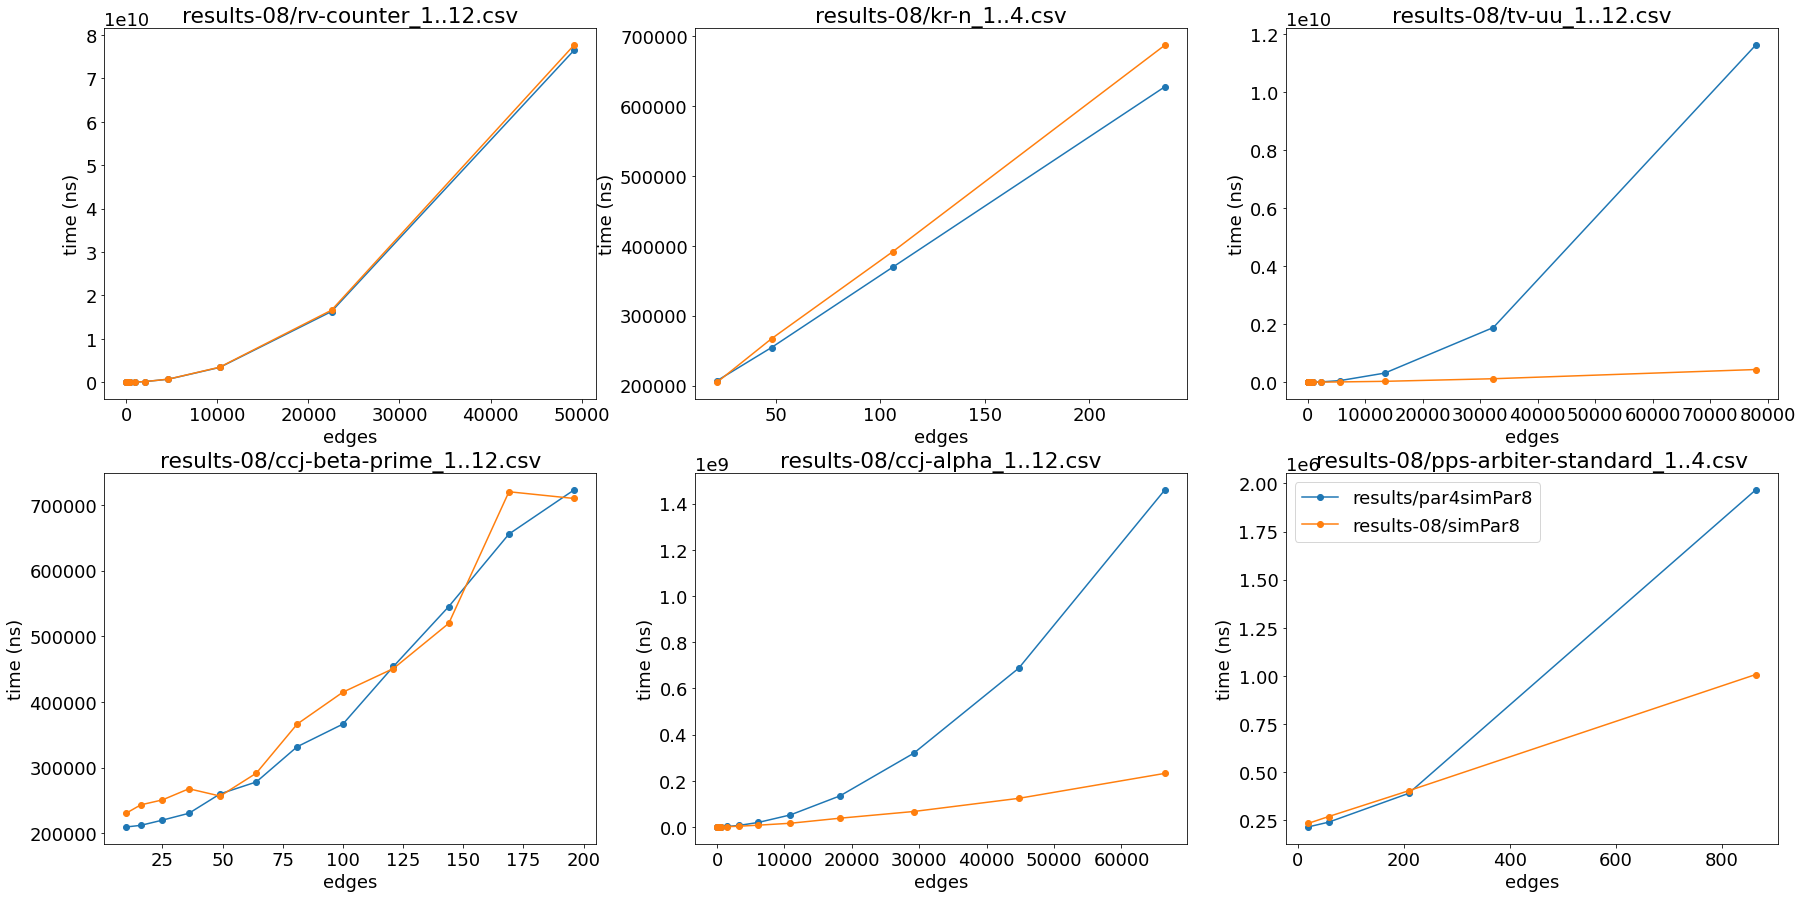

In [6]:
nb_bench=4
x='edges'
name='simPar8'
type='time'

bench_path = 'results/par4'
bench_csv = glob.glob(bench_path + '/*.{}'.format('csv'))

nb_bench_x = 2
nb_bench_y = (len(bench_csv) - 1) // nb_bench_x

(fig, axes) = plt.subplots(nb_bench_x, nb_bench_y, figsize=(30, 15))
axes = axes.flatten()

i = 0
for f in bench_csv:
    # Not usefull for gpgpu but needed in this example
    if f[-8:] == 'misc.csv' or f[-7:] == 'tmp.csv':
        continue

    bench = load_bench(f)

    if type == 'speed_up':
        show_speedup(bench, axes[i], nb_bench, x)
    else:
        show_bench(bench, axes[i], nb_bench, x, name=name, version=bench_path)

    axes[i].title.set_text(f)
    i += 1

bench2_path = last() + '/'
bench_csv = glob.glob(bench2_path + '/*.{}'.format('csv'))
i = 0
for f in bench_csv:
    # Not usefull for gpgpu but needed in this example
    if f[-8:] == 'misc.csv' or f[-7:] == 'tmp.csv':
        continue

    bench = load_bench(f)

    if type == 'speed_up':
        show_speedup(bench, axes[i], nb_bench, x)
    else:
        show_bench(bench, axes[i], nb_bench, x, name=name, version=bench2_path)

    axes[i].title.set_text(f)
    i += 1

plt.legend()

In [7]:
# Show the time for two benchs and show the speedup
def show_arrow(bench1, bench2, name1='', name2=''):
    plt.plot(bench1['edges'], bench1['real_time'], label=name1)
    plt.plot(bench2['edges'], bench2['real_time'], label=name2)

    x = bench2['edges'].values[-1]
    start_y = bench1['real_time'].values[-1]
    end_y = bench2['real_time'].values[-1]

    start = (x, start_y)
    end = (x, end_y)

    plt.annotate('', start, end, arrowprops=dict(arrowstyle='->'))
    plt.text(x * 0.80, (start_y + end_y) / 2, 'x ' + str(math.floor(start_y / end_y)))

    plt.gca().set_xlabel('edges')
    plt.gca().set_ylabel('time (ns)')

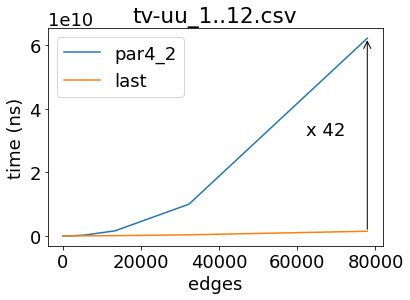

In [8]:
b = csvs[3]

old = load_bench('results/par4/' + b)
new = load_bench('results/par4_2/' + '/' + b)

n = len(old) // 4

show_arrow(old[:n], new[:n], 'par4_2', 'last')

plt.title(b)
plt.legend()
plt.show()